In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler

import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression


In [28]:
df = pd.read_csv("co2.csv").drop(columns=["Transmission","Make", "Fuel Type", "Vehicle Class", "Model"])
print(df)

      Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
0                2.0          4                               9.9   
1                2.4          4                              11.2   
2                1.5          4                               6.0   
3                3.5          6                              12.7   
4                3.5          6                              12.1   
...              ...        ...                               ...   
7380             2.0          4                              10.7   
7381             2.0          4                              11.2   
7382             2.0          4                              11.7   
7383             2.0          4                              11.2   
7384             2.0          4                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                                 6.7                               8.5   
1                    

In [29]:

print(df)
#if we wanted to, can convert text columns to unique ints

      Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
0                2.0          4                               9.9   
1                2.4          4                              11.2   
2                1.5          4                               6.0   
3                3.5          6                              12.7   
4                3.5          6                              12.1   
...              ...        ...                               ...   
7380             2.0          4                              10.7   
7381             2.0          4                              11.2   
7382             2.0          4                              11.7   
7383             2.0          4                              11.2   
7384             2.0          4                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                                 6.7                               8.5   
1                    

pd.factorize(df['Vehicle Class']) returns a tuple, where the first element ([0]) is the array of integers corresponding to the unique values in the "Vehicle Class" column

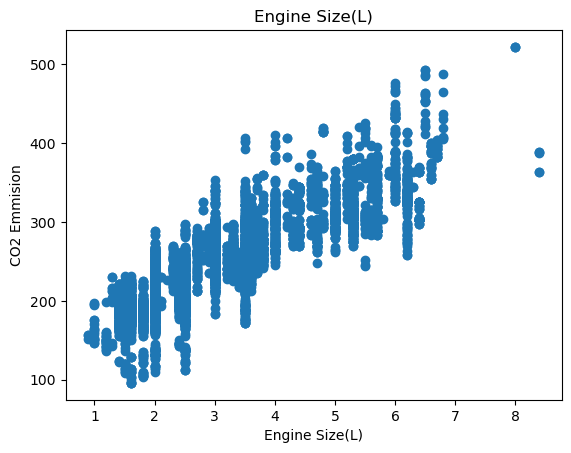

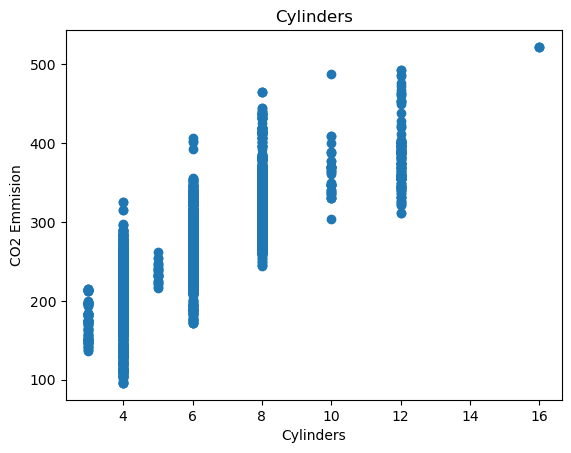

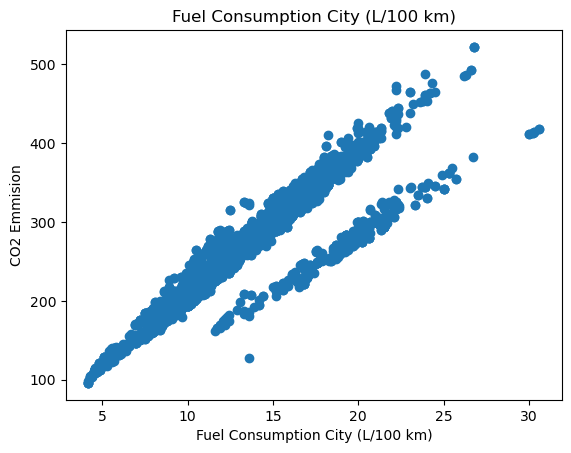

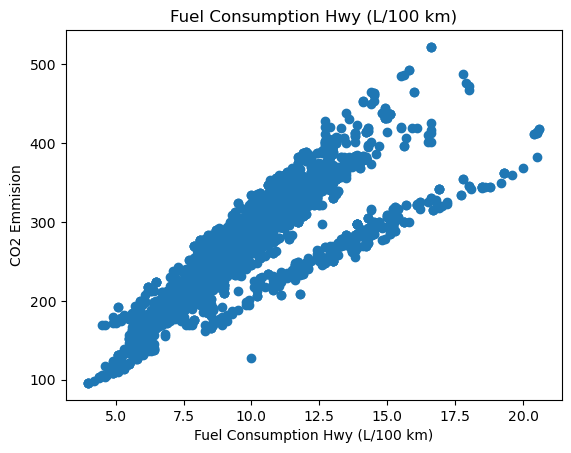

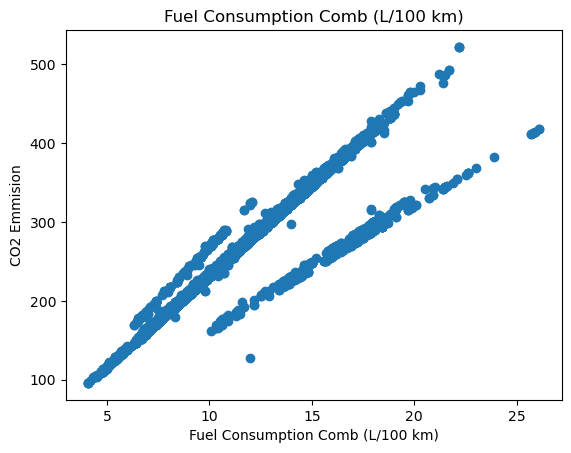

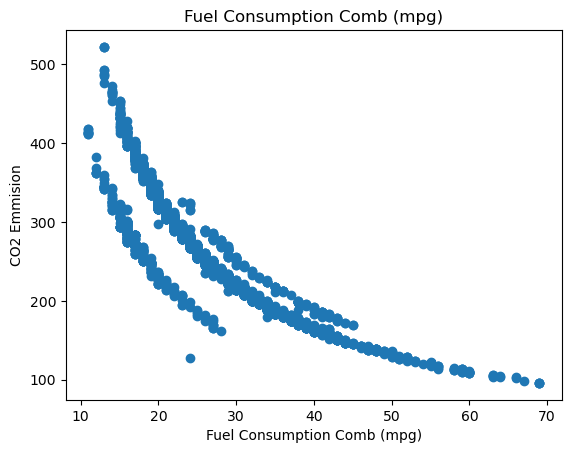

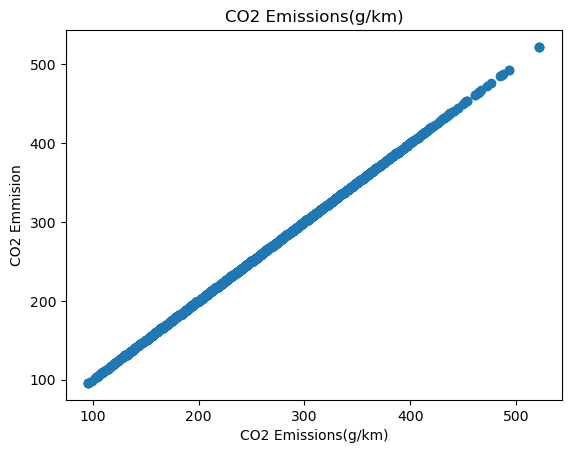

In [30]:
for label in df.columns[:]:
    plt.scatter(df[label],df["CO2 Emissions(g/km)"])
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("CO2 Emmision")
    plt.show()  

In [17]:
 #come back to see if dropping some columns helps
 

In [31]:
train, val  , test= np.split(df.sample(frac=1), [int(60*len(df)/100),int(80*len(df)/100)]) 

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [59]:
def get_xy(df, y_label, x_labels=None):
    #x_labels being none means get all columns from the df
    df= copy.deepcopy(df)
    if x_labels is None:
        x= df[[c for c in df.columns if c!= y_label]]
    else:
        if len(x_labels)==1:
            x= df[x_labels[0]].values.reshape(-1,1)
        else:
            x=df[x_labels].values


    
    y=df[y_label].values.reshape(-1,1)
    #taking values and converting to 2d

    data= np.hstack((x,y))

    return data, x,y




In [33]:
print(df.columns)

Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')


In [54]:

t,x_trainf,y_trainf=get_xy(train,"CO2 Emissions(g/km)",x_labels=["Fuel Consumption Comb (mpg)"])
v,x_valf,y_valf=get_xy(val,"CO2 Emissions(g/km)",x_labels=["Fuel Consumption Comb (mpg)"])
te,x_testf,y_testf=get_xy(test,"CO2 Emissions(g/km)",x_labels=["Fuel Consumption Comb (mpg)"])


In [55]:
freg= LinearRegression()
freg.fit(x_trainf,y_trainf)

LinearRegression()

In [63]:
freg.score(x_testf,y_testf)
#For regression models in scikit-learn, the score() method typically returns the R² score
#R2 score near 1 is a good predictor

0.8276979675395291

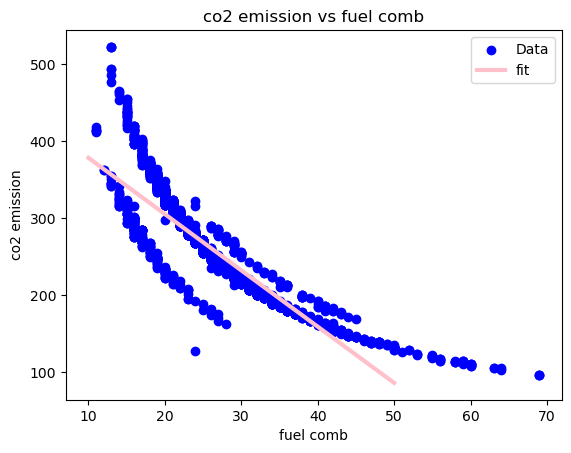

In [58]:
plt.scatter(x_trainf,y_trainf,label="Data", color="blue")
x= tf.linspace(10,50,70)
plt.plot(x,freg.predict(np.array(x).reshape(-1,1)),label="fit",color="pink",linewidth=3)
plt.legend()
plt.title("co2 emission vs fuel comb")
plt.ylabel("co2 emission")
plt.xlabel("fuel comb")
plt.show()


 tf.linspace is a function that generates evenly spaced values over a specified range. (1D tensor)
 

### Multiple Linear Regression


In [61]:

train, val  , test= np.split(df.sample(frac=1), [int(60*len(df)/100),int(80*len(df)/100)]) 
tm,x_train,y_train=get_xy(train,"CO2 Emissions(g/km)",x_labels=df.columns[:])
vm,x_val,y_val=get_xy(val,"CO2 Emissions(g/km)",x_labels=df.columns[:])
tem,x_test,y_test=get_xy(test,"CO2 Emissions(g/km)",x_labels=df.columns[:])

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [62]:
reg=LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

In [73]:
reg.score(x_test,y_test)


1.0

### Regression with Neural Network (single input)

In [77]:
f_normalizer= tf.keras.layers.Normalization(input_shape=(1,),axis=None)
#creating a normalization layer
#normalization refers to the process of adjusting the input data so that it has certain desirable properties, 
# such as a consistent range, mean, or variance.
#axis=None means normalization across all axes

f_normalizer.adapt(x_trainf.reshape(-1))
#The adapt() function computes the mean and variance of the input data
#after this, we can use the f_normalizer to transform data




In [78]:
f_nn_model= tf.keras.Sequential([
    f_normalizer,
    tf.keras.layers.Dense(1)
    #only 1 node in dense layer means no alterations, i.e. LINEAR LAYER
])

In [80]:
f_nn_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss='mean_squared_error',
        )

In [81]:
history= f_nn_model.fit(
    x_trainf.reshape(-1),y_trainf,
    verbose=0,
    epochs=1000,
    validation_data=(x_valf,y_valf)

)

In [86]:
def plot_loss(history):
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)

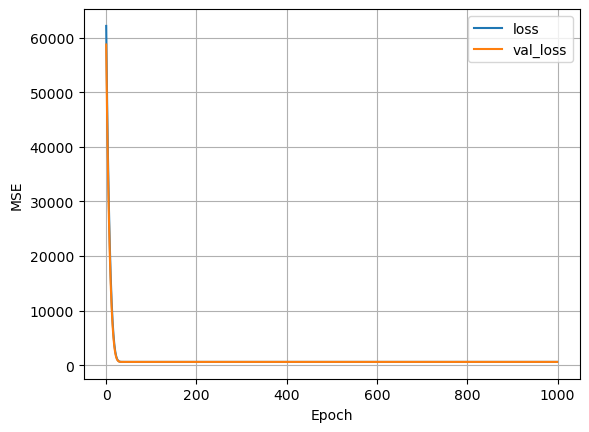

In [87]:
plot_loss(history)

In [88]:
#values are converging

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


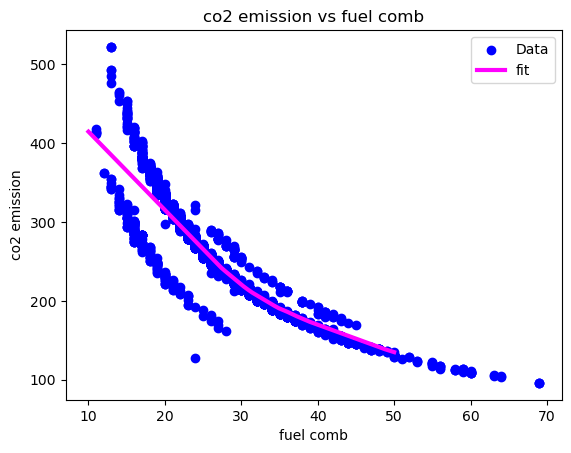

In [181]:
plt.scatter(x_trainf,y_trainf,label="Data", color="blue")
x= tf.linspace(10,50,70)
plt.plot(x,f_nn_model.predict(np.array(x).reshape(-1,1)),label="fit",color="magenta",linewidth=3)
plt.legend()
plt.title("co2 emission vs fuel comb")
plt.ylabel("co2 emission")
plt.xlabel("fuel comb")
plt.show()


### Neural Network 


In [149]:
f_normalizer= tf.keras.layers.Normalization(input_shape=(1,),axis=None)
f_normalizer.adapt(x_trainf.reshape(-1,1))



f_nn_model= tf.keras.Sequential([
    f_normalizer,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1),


])

f_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error',)


In [150]:
history= f_nn_model.fit(
    x_trainf, y_trainf,
    validation_data=(x_valf,y_valf),
    verbose=0, epochs=100
)

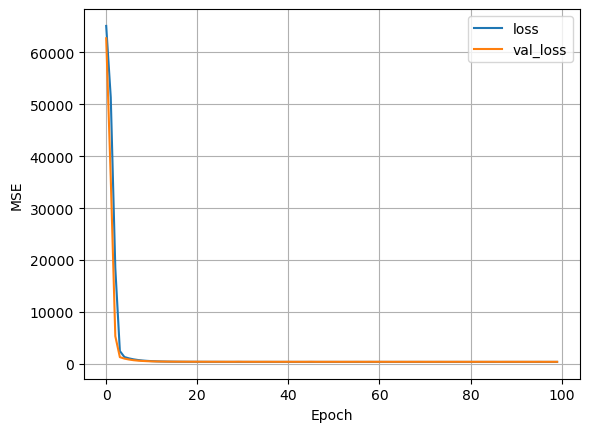

In [151]:
plot_loss(history)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


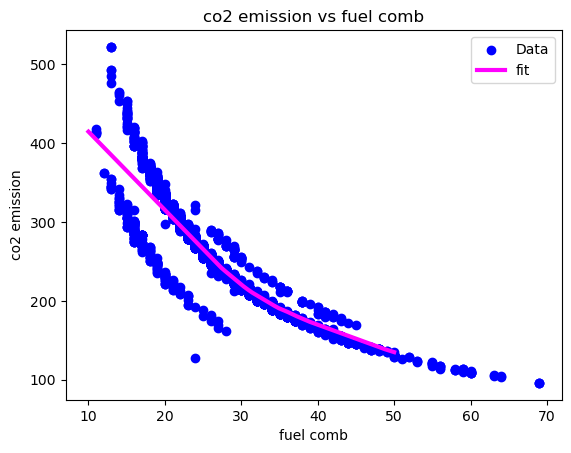

In [154]:
plt.scatter(x_trainf,y_trainf,label="Data", color="blue")
x= tf.linspace(10,50,70)
plt.plot(x,f_nn_model.predict(np.array(x).reshape(-1,1)),label="fit",color="magenta",linewidth=3)
plt.legend()
plt.title("co2 emission vs fuel comb")
plt.ylabel("co2 emission")
plt.xlabel("fuel comb")
plt.show()


In [157]:
print(x_train.shape)

(4431, 7)


### Neural Multiple

In [210]:
all_normalizer= tf.keras.layers.Normalization(input_shape=(7,1),axis=-1)
all_normalizer.adapt(x_train)

In [211]:
nn_model= tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1),


])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error',)


In [212]:
history= nn_model.fit(
    x_train, y_train,
    validation_data=(x_val,y_val),
    verbose=0, epochs=100
)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_103" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 7, 7)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 7), dtype=float32)
  • training=True
  • mask=None

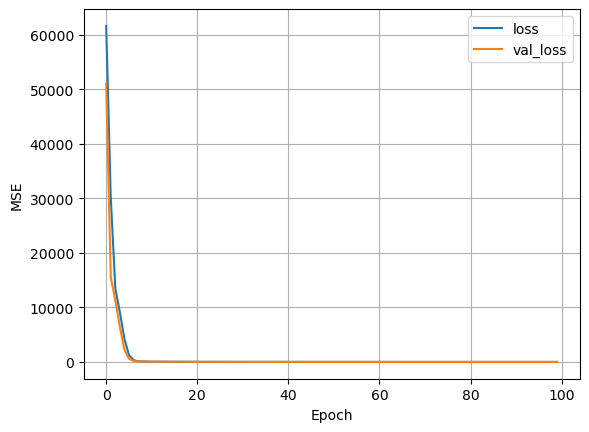

In [208]:
plot_loss(history)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


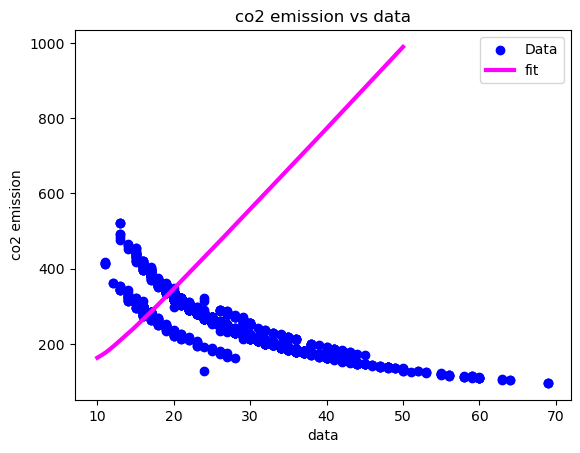

In [209]:
plt.scatter(x_trainf,y_trainf,label="Data", color="blue")
x= tf.linspace(10,50,70)
plt.plot(x,nn_model.predict(np.array(x).reshape(-1,1)),label="fit",color="magenta",linewidth=3)
plt.legend()
plt.title("co2 emission vs data")
plt.ylabel("co2 emission")
plt.xlabel("data")
plt.show()
